<h1>Data Wrangling</h1>



<h3 style="color:red">Task 1 Started </h3>

<p style="color:green;font-weight: bold;font-style: italic;">The Task 1 is about Parsing the property sales data stored in “data.dat"
<br>
First Step is to examine and load the data into a Pandas DataFrame.
I have parsed the loaded data so that each sales record has the following attributes:
</p>
<table style="width:100%; border: 1px solid black;">
<tr>
<th>Attribute</th>
<th>Description</th>
</tr>
<!-- Date-->
<tr>
<td>Date</td>
<td>Date of the property sold, e.g., 20140502T000000</td>
</tr>
<!-- Price-->
<tr>
<td>price</td>
<td>Property sold price</td>
</tr>
<!-- BedRooms-->
<tr>
<td>bedrooms</td>
<td>Number of bedrooms</td>
</tr>
<!-- BathRooms-->
<tr>
<td>bathrooms</td>
<td>Number of bathrooms, the value of which can be either an integer or a fraction ending with .25, .5, and .75. For example, 0.5 accounts for a room with a toilet but no shower </td>
</tr>
<!-- Square Feet Living Area-->
<tr>
<td>sqft_living</td>
<td>Square footage of the property's interior living space, it is equal to the sum of basement area (i.e., sqft_basement) and the above living area (i.e., sqft_above) </td>
</tr>
<!-- Square Feet Lot Area-->
<tr>
<td>sqft_lot</td>
<td>Square footage of the land space</td>
</tr>
<!-- Floors-->
<tr>
<td>floors</td>
<td>Number of floors</td>
</tr>
<!-- Water Front-->
<tr>
<td>waterfront</td>
<td>Whether the property was overlooking the waterfront or not</td>
</tr>
<!-- View-->
<tr>
<td>view</td>
<td>An index from 0 to 4 of how good the view of the property was</td>
</tr>
<!-- Condition-->
<tr>
<td>condition</td>
<td>An index from 1 to 5 on the condition of the property.</td>
</tr>
<!-- Square Feet  Above-->
<tr>
<td>sqft_above</td>
<td>The square footage of the interior living space that is above ground level </td>
</tr>
<!-- Square Feet Basement-->
<tr>
<td>sqft_basement</td>
<td>The square footage of the interior living space that is below ground level </td>
</tr>
<!-- Year Built-->
<tr>
<td>yr_built</td>
<td>The year the property was initially built </td>
</tr>
<!-- Year Renovated-->
<tr>
<td>yr_renovated</td>
<td>The year of the property's last renovation</td>
</tr>
<!-- Street-->
<tr>
<td>street</td>
<td>The street address of the property, e.g., “3140 Franklin Ave E”</td>
</tr>
<!-- City-->
<tr>
<td>city</td>
<td>The city where the property is, e.g., “Seattle”</td>
</tr>
<!-- State and Zip Code-->
<tr>
<td>statezip</td>
<td>The zip code area where the property is, which contains state and zip code, separated by a space. For example, “WA 98115”, where WA is the abbreviation of Washington and the number is the zip code.</td>
</tr>
<!-- Country-->
<tr>
<td>country</td>
<td>The country where the property is, e.g., “USA”</td>
</tr>
</table>
<p style="color:green;font-weight: bold;font-style: italic;">
 Now I have a DataFrame where each row is a sales record and each column is one of the attributes listed in the table above. All the columns are labeled with attribute names shown in the table and also have a proper data type (e.g., integer, string, float, date, etc).
</p>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#import seaborn as sns
from pandas.io.json import json_normalize
import re as re
import datetime as dt
from dateutil.parser import parse # for date format check
from sklearn.linear_model import LinearRegression # for price prediction
from sklearn.cross_validation import train_test_split # for splitting the data
% matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Opening File Data and Converting it into pandas Dataframe
file_handle=open('data.dat')
#print (file_handle.read())
file_data=file_handle.read()
file_data=json.loads(file_data) # Loading the Data into a json python dictionary
file_handle.close() # Closing file Handle
#print (type(file_data))
dataframe = json_normalize(file_data['houses']) # Creating a dataframe based on json dictionary
#print (type(dataframe))

In [3]:
# Assigning Data Types and Creating Data Columns
#print (dataframe.shape)
#print (dataframe.describe())
# Finding Street Address, City, Country and statezip from address
address_list=dataframe['address'].tolist()
street_address=[]
country=[]
statezip=[]
city=[]
for address in address_list:
    address_list=address.split(',')
    if len(address_list) !=4:
        print ("Address not formatted")
    street_address.append(address_list[0].strip())
    city.append(address_list[1].strip())
    statezip.append(address_list[2].strip())
    country.append(address_list[3].strip())
dataframe['country']=country # Adding to data frame
dataframe['street']=street_address# Adding to data frame
dataframe['city']=city# Adding to data frame
dataframe['statezip']=statezip# Adding to data frame
dataframe.tail()
#dataframe.shape
# Creating sqft_living and sqft_lot
sqft_list=dataframe['area.sqft_living/sqft_lot'].tolist()
sqft_living=[]
sqft_lot=[]
for area in sqft_list:
    #print (area)
    area_list=area.split("=")
    if area_list[0]!="sqft_living/sqft_lot":
        print ("Error")
    else:
        area_list=area_list[1].split(" ")
        #print (area_list[0][:-1])
        sqft_living.append(area_list[0][:-1])
        sqft_lot.append(area_list[1])
dataframe['sqft_living']=sqft_living # appending new series to dataframe
dataframe['sqft_lot']=sqft_lot # appending new series to dataframe

In [4]:

# Creating number of bathrooms and bedrooms
# Note in some rows no of bathrooms is after the no of bedrooms
dataframe.head()
rooms_list=dataframe['rooms'].tolist() # Converting them to a list and not changing the order
bedrooms=[]
bathrooms=[]
room_data=[]
updated_rooms=[]
for rooms in rooms_list:
    #print (rooms)
    rooms=rooms.split(';')
    #print (rooms)
    room_data=rooms[0].split(':')
    if room_data[0][10:] !="bathrooms":
        rooms.reverse() # Reversing the order of bathroom and bedroom
        updated_rooms.append(rooms)
    else:
        updated_rooms.append(rooms)
for room in updated_rooms:
    room[0]=room[0].strip()
    room[1]=room[1].strip()
    #print (room[1])
    bathrooms.append(room[0][21:]) # finding number of bathrooms
    bedrooms.append(room[1][20:])# finding number of bedrooms
dataframe['bedrooms']=bedrooms # appending new series to dataframe
dataframe['bathrooms']=bathrooms# appending new series to dataframe
dataframe.head()
dataframe.drop('address',inplace=True,axis=1) # Dropping Address Column
dataframe.drop('area.sqft_living/sqft_lot',inplace=True,axis=1) # Dropping area.sqft_living/sqft_lot Column
dataframe.drop('rooms',inplace=True,axis=1) # Dropping rooms Column
#dataframe.head()

In [5]:
# Renaming Columns and Ordering 
#print (dataframe.columns)
dataframe.rename(columns={ "area.sqft_above": "sqft_above","area.sqft_basement":"sqft_basement"},inplace=True)
dataframe = dataframe[['date', 'price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront'
                       ,'view','condition','sqft_above','sqft_basement','yr_built','yr_renovated',
                      'street','city','statezip','country']]


In [6]:
#Changing Types of columns
dataframe.dtypes
# Changing Date Column Type to Date from Object
# 23 05 2014
# changing bedroom to int
dataframe['bedrooms']=dataframe.bedrooms.astype('int')
dataframe.dtypes
# changing bathroom to float
dataframe['bathrooms']=dataframe.bathrooms.astype('float')
# changing sqft_living to float
dataframe['sqft_living']=dataframe.sqft_living.astype('int')
# Chanign sqft_lot to float
dataframe['sqft_lot']=dataframe.sqft_lot.astype('int')
# Changing Year_Renovated to int
# As we cannot convert Nan to int 
# Nan values means that the property hasnt been renovated 
# So replacing Nan values to 0 
dataframe.yr_renovated=dataframe.yr_renovated.fillna(0).astype(int)
print (dataframe.dtypes)


date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object



<h5 style="color:red"> Date is still an object because there are some issues with its format 
 I will convert it after removing all the issues </h5>

<h3 style="color:red">Task 1 Finished </h3>

<h3 style="color:red">Task 2 Started </h3>

<p style="color:green;font-weight: bold;font-style: italic;">In this task, I have inspected and audited the data to identify the data problems and then fixed the problems. 
Different generic and major data problems found in the data included:
</p>
<ul style="color:black;font-weight: bold;font-style: italic;">
<li>Lexical errors, e.g., typos and spelling mistakes</li>
<li>Irregularities, e.g., abnormal data values and data formats</li>
<li>Violations of the Integrity constraint.</li>
<li>Outliers</li>
<li>Duplications</li>
<li>Missing values</li>
<li>Inconsistency, e.g., inhomogeneity in values and types in representing the same data</li>
</ul>

<div style="color:red">
<h4>Step 1 is to remove the Lexical Errors</h4>
<h5>Lexical Errors are usually found in String (object) data types<br>
Objects data types in this data frame are street,city,statezip and country</h5>
<p>There is only one country in the dataset that is USA <br>
There is only one State that is WA or Washington D.C<br>
The range of the zip code is 98001 to 94403<br>
All of them are inside washington boundries
<br>
</p>
</div>


In [7]:
# Country should be USA
print (dataframe.country.unique())

# Checking Lexical Errors for State Zip. The format is 0000 AA where 0000 is the zip code and AA is the state acronym
statelist=dataframe['statezip'].tolist()
unique_state_set=[]
for states in statelist:
    unique_state_set.append(states[:2])
print (set(unique_state_set))
# Only state is  WA or Washington, D.C


# Now All the Zip codes should be from Washington D.C as well
# The range of Washington zip codes is 98001  to 99403
# Checking Zip code
zip_list=[]
for states in statelist:
    zip_list.append(int(states[3:]))
for zip in zip_list:
    if zip < 98001 or zip > 99403:
        print ("Error! Zip code and state doesnt match")
zip_set=set(zip_list)
print (len(zip_set))
## 77 Unqiue Zip Codes and all in Washington D.C
# No errors found in Statezip values 


['USA']
{'WA'}
77


<div style="color:red">
<h5>Spelling Mistakes in Cities column</h5>
<p> A lot of spelling mistakes were found in Cities which I have rectified in the <br>
following code</p>
</div>

In [8]:
# Checking city for lexical errors
# The city Auburn is misspelled as Auburnt and auburn and as Auburn 
# Converting them to Auburn
dataframe.city.replace({'Auburnt':'Auburn','auburn':'Auburn'},inplace=True)
# The City Sammamish has been misspelled as samamish and sammamish
dataframe.city.replace({'Samamish':'Sammamish','sammamish':'Sammamish'},inplace=True)
# The City Seattle  has been misspelled as seattle and Seaattle and Seatle
dataframe.city.replace({'Seaattle':'Seattle','Seatle':'Seattle','seattle':'Seattle'},inplace=True)
# The city Redmond has beeen misspelled and mistyped as Redmonde and redmond and Redmund
dataframe.city.replace({'Redmonde':'Redmond','redmond':'Redmond','Redmund':'Redmond'},inplace=True)
# The city Bellevue has been  misspelled and mistyped as Bellvue  and Bellevue and Belleview
dataframe.city.replace({'Bellvue':'Bellevue','Bellevue':'Bellevue','Belleview':'Bellvue'},inplace=True)
# The city Kirkland has been  misspelled and mistyped as Kirklund 
dataframe.city.replace({'Kirklund':'Kirkland'},inplace=True)
# The city Issaquah has been  misspelled and mistyped as Issaguah
dataframe.city.replace({'Issaguah':'Issaquah'},inplace=True)
# The city Woodinville has been  misspelled and mistyped as Woodenville
dataframe.city.replace({'Woodenville':'Woodinville'},inplace=True)
# The city Carnation has been  misspelled and mistyped as Coronation
dataframe.city.replace({'Coronation':'Carnation'},inplace=True)
# The city Snoqualmie has been  misspelled and mistyped as Snogualmie
dataframe.city.replace({'Snogualmie':'Snoqualmie'},inplace=True)
# The city Shoreline has been  misspelled and mistyped as Sureline
dataframe.city.replace({'Sureline':'Shoreline'},inplace=True)
# 45 Unique Cities
len(dataframe.city.unique())

45

<div style="color:green">
<h5>Lexical Errors have been removed</h5>
</div>

<div style="color:red">
<h5>Step 2 is to remove Irregularities such as abnormal data values and data formats</h5>
<p>The first issue was with the dates in the dataset <br>
which have been fixed in the code below and the data has been converted to its proper datetime format</p>
</div>

In [9]:
# There is no 20140631T00000 ( incorrect date as there is no 31st of june), so I have changed it to 30-06-2014
# The date format at index 4335 is 23052014T000000 which is incorrect it should be 20140523T000000
dataframe.date.replace({'20140631T000000':'20140630T000000'},inplace=True)
dataframe.date.replace({'23052014T000000':'20140523T000000'},inplace=True)
# fixed date issues
# checking for date issues
date_list=[]
date_list=dataframe.date.tolist()
for date in date_list:
    parse(date) 
# No More Issues
# Converting date into specified datetime format
pd.to_datetime(dataframe.date)
dataframe.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20140502T000000   313000.0         3       1.50         1340      7912   
1  20140502T000000  2384000.0         5       2.50         3650      9050   
2  20140502T000000   342000.0         3       2.00         1930     11947   
3  20140502T000000   420000.0         3       2.25         2000      8030   
4  20140502T000000   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0             0      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4             0         9105 170th Ave NE    Redmond  WA 98052     USA

<div style="color:red">
<h5></h5>
<p>The next issue was with the values for bathrooms in the dataset <br>
No bathrooms should have any fraction other than .00, .5 ,.25 and .75<br>
In the below code these issues have been fixed </p>
</div>

In [10]:

#bathroom_list=dataframe.bathrooms.tolist()
#print (set(bathroom_list))
# Converting into set for a better view 
# There are fraction values of 1.7, 2.3, 1.05,2.55 and 2.57
# I belive these values are either mistyped or are irregular. 
# 1.7 should be 1.75 (5 is missing)
# 2.3 should be 2.25 (rounded off to 2.3 somehow)
# 1.05 should be 1.50 (mistyped  0 before 5)
# 2.57 should be 2.75 (mistyped 5 before 7)
# 2.55 should be 2.50
dataframe.bathrooms.replace({1.7:1.75,2.3:2.25,1.05:1.50,2.57:2.75,2.55:2.50},inplace=True)


<div style="color:green">
<h5> Irregularities have been removed</h5>
</div>

<div style="color:red">
<h5>Step 3 is to remove Violations of the Integrity constraints</h5>
<p></p>
</div>

In [11]:
# Year built should be the same or should be  before Yr_Renovated
# So no rows should have a year built bigger than yr_renovated
# as no houses should be renovated before it is built
print (dataframe[(dataframe.yr_built>dataframe.yr_renovated) & (dataframe.yr_renovated>0) ])
# but we have 4 cases in which this has been happend at index 4340,4341,4342 and 4345
# upon inspection I belive that these values have been incorrectly place 
# and both need to be swapped with each other
# At index 4340 yr_built should be 1913 and yr_renovated should be 1966
dataframe.loc[4340,'yr_built']=1913
dataframe.loc[4340,'yr_renovated']=1966
# At index 4341 yr_built should be 2003 and yr_renovated should be 2004
dataframe.loc[4341,'yr_built']=2003
dataframe.loc[4341,'yr_renovated']=2004
# At index 4342 yr_built should be 1912 and yr_renovated should be 2012
dataframe.loc[4342,'yr_built']=1912
dataframe.loc[4342,'yr_renovated']=2012
# At index 4345 yr_built should be 1923 and yr_renovated should be 2013
dataframe.loc[4345,'yr_built']=1923
dataframe.loc[4345,'yr_renovated']=2013
# Now no more such issues
print (dataframe[(dataframe.yr_built>dataframe.yr_renovated) & (dataframe.yr_renovated>0) ])

                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4340  20140502T000000  440000.0         4       2.25         2160      8119   
4341  20140526T000000  690000.0         4       2.50         2700      8810   
4342  20140508T000000  375000.0         6       2.25         3206      5793   
4345  20140522T000000  850000.0         4       3.25         3090      6744   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4340     1.0           0     0          3        1080           1080   
4341     2.0           0     0          3        2700              0   
4342     2.0           0     0          3        3206              0   
4345     2.0           0     4          3        3090              0   

      yr_built  yr_renovated                            street       city  \
4340      1966          1913                  12211 SE 65th St   Bellevue   
4341      2004          2003                 11659 168th Ct NE    Redmond   
4342      20

In [12]:
# sqft_living should be sqft_basement +  sqft_above
# floor must be >0 and >1 if it has a value for sqft_basement
print (dataframe[dataframe.sqft_living!=dataframe.sqft_basement+dataframe.sqft_above])
# There are two such cases which are not correct
# First case is at index 4338 where sqft_living is 1280 
# but sqft_basement is 1420 and sqft_above is 1280
# As the basement cannot be more than the sqft_living 
# the value of basement is incorrect
# So The value in sqft_basement is 1420 because of some typing error
# It should be replaced with 140
# So now we have both sqft_basement and sqft_above accurate values 
# updating sqft_living as well
dataframe.loc[4338,'sqft_basement']=140
dataframe.loc[4338,'sqft_living']=140+1280
# The second case is at index 4339 where sqft_living is 890
# but sqft_basement is 0 and sqft_above is 590
# My assumption based for this data set is that
# sqft_lot should be greater than or equal to sqft_living
# here sqft_living is higher than sqft_lot which is not possible
# so the value of sqft_above is correct
dataframe.loc[4339,'sqft_living']=dataframe.loc[4339,'sqft_above']
# No More issues like that are found
print (dataframe[dataframe.sqft_living!=dataframe.sqft_basement+dataframe.sqft_above])


                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4338  20140710T000000  670000.0         3        2.5         1280      1438   
4339  20140701T000000  202000.0         1        1.0          890       833   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4338     2.0           0     0          3        1280           1420   
4339     1.0           0     0          4         590              0   

      yr_built  yr_renovated              street     city  statezip country  
4338      2003             0  746 Boylston Ave E  Seattle  WA 98102     USA  
4339      1926             0    701-711 26th Ave  Seattle  WA 98122     USA  
Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []


<div style="color:green">
<h5> Integrity issues have been fixed</h5>
</div>

<div style="color:red">
<h5>Next step is to remove duplicate records</h5>
<p>In the below code duplicate records have been dealt with </p>
</div>

In [13]:
# If the address and the date sold is the same it is the same property
# Two Records with same address and date are found
#print (dataframe[dataframe.duplicated(['city','street','date'],keep='first')])
#print (dataframe[dataframe.duplicated(['city','street','date'],keep='last')])
# Records 1024 and 1017 are the same
# Lets examine these records
print (dataframe[(dataframe.index==1024) | (dataframe.index==1017)])
# Not Dropping record 1024 or 1017 because both records have different data. They might be a date error
# somewhere but we cannot be certain which date to impute here. So we leave them as it is.


# Records 4336 and 4337 are exactly the same 
# Lets examine these records
# They both contain the exact same data. So deleting one of them.
dataframe[(dataframe.index==4336) | (dataframe.index==4337)]
dataframe.drop(dataframe.index[4337],inplace=True)
dataframe.shape # now number of rows are 4600

                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1017  20140520T000000  300000.0         6       5.25         2860      5682   
1024  20140520T000000  206000.0         4       2.00         1700      6025   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
1017     2.0           0     0          3        2860              0   
1024     1.0           0     0          3        1700              0   

      yr_built  yr_renovated         street    city  statezip country  
1017      1978             0  606 5th St SE  Auburn  WA 98002     USA  
1024      1978             0  606 5th St SE  Auburn  WA 98002     USA  


(4600, 18)

In [14]:
# Fixing Missing Values in Year Renovated
# We find that some have 0's in year renovated. we fill these values by inserting yr_build values in yr_renovated for
# these records
# Finding 0's records 
# Changing to yr_built
yr_built_list=[]
yr_renovated_list=[]
new_renovated_list=[]
yr_built_list=dataframe['yr_built'].tolist()
yr_renovated_list=dataframe['yr_renovated'].tolist()
print (len(yr_built_list))
for i in range(0,len(yr_renovated_list)):
    if yr_renovated_list[i]==0: # If 0 is found append built year value
        new_renovated_list.append(yr_built_list[i])
    else:
        new_renovated_list.append(yr_renovated_list[i]) # else append renovated year value
dataframe['yr_renovated']=new_renovated_list # Updating yr_renovated_list


4600


<div style="color:green">
<h5> Duplications have been removed</h5>
</div>

<div style="color:red">
<h5>Next step is to find and impute missing values</h5>
<p>In the below code I am searching for Nan or Missing values for Object and Date Datatypes</p>
</div>

In [15]:
# Checking for Missing Values for object and date types 
# First checking date (date type) for Null Values
print (dataframe.date.isnull().values.any())
# No missing values found
# Now checking object data type
# Checking Street
print (dataframe.street.isnull().values.any())
# No missing values found
# Checking city
print (dataframe.city.isnull().values.any())
# No missing values found
# Checking State Zip
print (dataframe.statezip.isnull().values.any())
# No missing values found
# Checking Country
print (dataframe.country.isnull().values.any())
# No missing values found

False
False
False
False
False


<p style='color:green'>No missing values found </p>

<div style="color:red">
<p>In the below code I am searching for Missing values for int and float Datatypes</p>
</div>

In [16]:
# Checking for Float (price,bathroom and floors)
# Checking for bathrooms value  < 0.25 as 0.25 is the minimum possible value 
dataframe[dataframe.bathrooms <0.25]
# As there are only two records at index 2365 and 3209 which have these values
# it is possible that these are just large properties for recreational purposes. 
# and not livable houses. So these missing values are justified
# Checking for floors <0
dataframe[dataframe.floors<0]
# There are no missing values for floors

# Checking for price < 0 
#There are 248 Missing Prices for records
print (len(dataframe[dataframe.price==0]))
# These missing prices would be dealth would be imputed after checking for all the other missing value
dataframe.dtypes

248


date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [17]:
round(1295648,-1)

1295650

In [18]:
# checking integer type values
# Checking bedrooms for missing values
# As there are only two records at index 2365 and 3209 which have these values
# it is possible that these are just large properties for recreational purposes. 
# and not livable houses. So these missing values are justified
print (dataframe[dataframe.bedrooms<=0])

# Checking for Sqft_lot  if it is <0 
print (dataframe[dataframe.sqft_lot <0])# No such issues are found

# Checking for waterfront if it is <0 
print (dataframe[dataframe.waterfront <0])# No such issues are found

# Checking for view  if it is <0 
print (dataframe[dataframe.view <0])# No such issues are found

# Checking for condition  if it is <0 
print (dataframe[dataframe.condition <0])# No such issues are found

# Checking for sqft_above  if it is <0 
print (dataframe[dataframe.sqft_above <0])# No such issues are found

# Checking for sqft_basement  if it is <0 
print (dataframe[dataframe.sqft_basement <0])# No such issues are found

# Checking for yr_built  if it is <1900
print (dataframe[dataframe.yr_built <1900])# No such issues are found

# Checking for yr_renovated if it is <1900
print (dataframe[dataframe.yr_renovated <1900])# No such issues are found


                 date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2365  20140612T000000  1095000.0         0        0.0         3064      4764   
3209  20140624T000000  1295648.0         0        0.0         4810     28008   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
2365     3.5           0     2          3        3064              0   
3209     2.0           0     0          3        4810              0   

      yr_built  yr_renovated            street     city  statezip country  
2365      1990          1990     814 E Howe St  Seattle  WA 98102     USA  
3209      1990          1990  20418 NE 64th Pl  Redmond  WA 98053     USA  
Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []
Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfron

<p style='color:green'>No missing values found in columns except Price</p>

<p style='color:red'>Bofore Fixing Price Values, we need to find and remove outliers for price</p>

<div style="color:red">
<h5>Next step is to detect outliers in the dataset</h5>
<p>In the below code I am searching for  outliers in price</p>
</div>

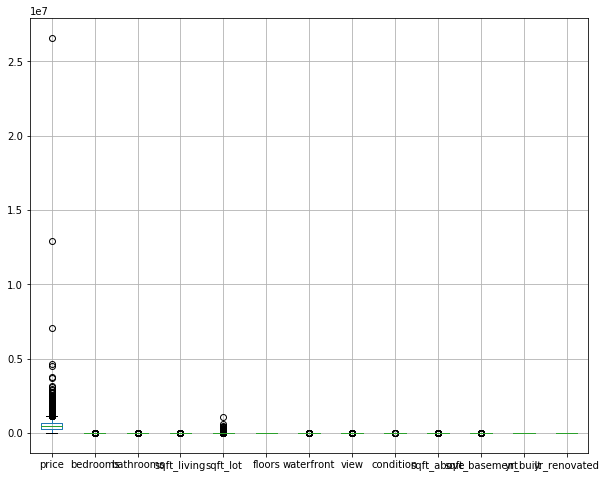

In [19]:
# Now checking price for Outliers by showing boxplots
plt.figure(figsize=(10,8))
dataframe.boxplot()
plt.show()

In [20]:
# As we can see there are a lot of outliers in the prices column and sqft_lot
# if we try to predict the absent prices, these outliers will give us an 
# incorrect estimate


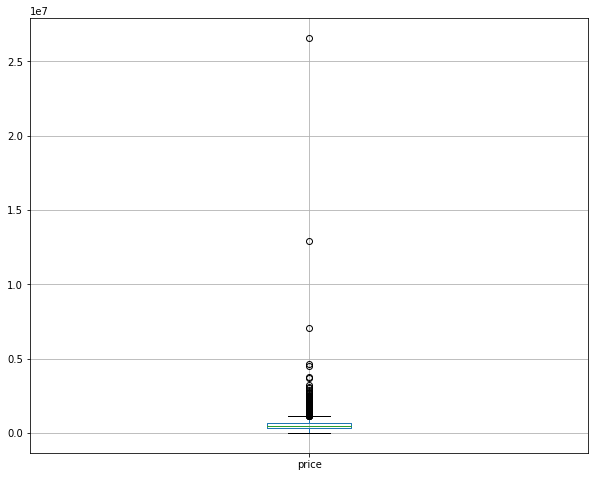

In [21]:
# Now checking price for Outliers in the price by showing boxplots
plt.figure(figsize=(10,8))
dataframe.boxplot(column=['price'])
plt.show()

In [22]:
# The extreme outliers for the price data are below
dataframe[dataframe.price >5000000]

date       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2286  20140611T000000   7062500.0         5        4.5        10040     37325   
4347  20140623T000000  12899000.0         3        2.5         2190     11394   
4351  20140703T000000  26590000.0         3        2.0         1180      7793   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
2286     2.0           1     2          3        7680           2360   
4347     1.0           0     0          3        1550            640   
4351     1.0           0     0          4        1180              0   

      yr_built  yr_renovated             street      city  statezip country  
2286      1940          2001   4442 95th Ave NE  Bellevue  WA 98004     USA  
4347      1956          1956    5426 40th Ave W   Seattle  WA 98199     USA  
4351      1992          1992  12005 SE 219th Ct      Kent  WA 98031     USA

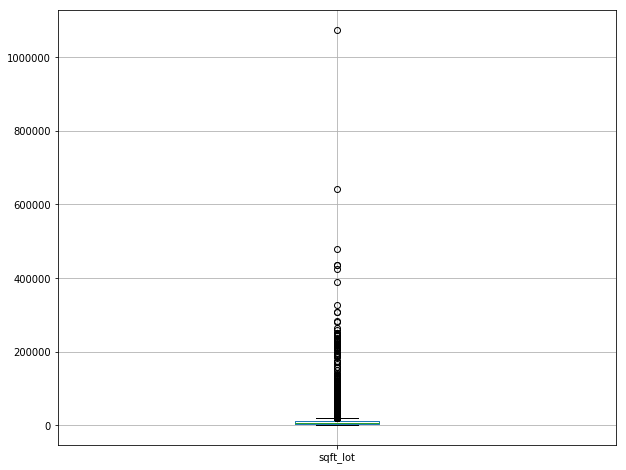

In [23]:
# Now checking price for Outliers in the price by showing boxplots
plt.figure(figsize=(10,8))
dataframe.boxplot(column=['sqft_lot'])
plt.show()

In [24]:
dataframe[dataframe['sqft_lot']> 600000]


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1078  20140521T000000  542500.0         5       3.25         3010   1074218   
2480  20140613T000000  849900.0         2       2.00         2280    641203   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
1078     1.5           0     0          5        2010           1000   
2480     2.0           0     0          3        2280              0   

      yr_built  yr_renovated                    street      city  statezip  \
1078      1931          1931  16200-16398 252nd Ave SE  Issaquah  WA 98027   
2480      1990          1990          9326 SW 216th St    Vashon  WA 98070   

     country  
1078     USA  
2480     USA

In [25]:
# Creating a new dataframe without these outliers
new_dataframe=dataframe[(dataframe.price <= 5000000 ) & (dataframe.sqft_lot <= 600000)]

In [26]:
# Checking how many rows has price missing
print ("The number of rows having price equal to 0 is "+str(len(new_dataframe[new_dataframe.price == 0])))

The number of rows having price equal to 0 is 248


In [27]:
# Using Linear Model for price imputation
# As linear regression cant work on object datatype 
# we remove the object datatype
dataframe_for_regression=new_dataframe
dataframe_for_regression.drop(['street','city','statezip','country','date'], axis =1,inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
# Creating and Fitting a Linear Regression Model
lm=LinearRegression()
X=dataframe_for_regression[[x for x in dataframe_for_regression.columns if x!= 'price']]
y=dataframe_for_regression.price
dataframe_for_regression.head()
lm.fit(X,y)
#predictions = lm.predict(X)
dataframe['price'][dataframe['price'] == 0] = lm.predict(dataframe.drop(['price','date','street','city','statezip','country'],axis=1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# Splitting train and test dataset
X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:,2:14],dataframe.iloc[:,1:2],random_state=112)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Fitting the model on training dataset
lm.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# All prices have been predicted
dataframe[dataframe.price == 0]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

In [32]:
accuracy = lm.score(X_test, y_test)
print ("The Accuracy rate is  {} %".format(int(round(accuracy * 100))))
# The accuracy of the test is 64%

The Accuracy rate is  64 %


<div style="color:green">
<h5>Missing Values have been identified and fixed</h5>
</div>

<div style="color:green">
<h5>Inconsistency and inhomogeneity</h5>
<p>
All Inconsistency and inhomegenity have been removed. The dataset is ready for data modelling</p>
</div>

<div style="color:green">
<h5>Writing the CSV File</h5>
<p>
The list of attributes are : 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country' <br></p>
<p style="color:red">Note: There is no Index Attribute in the CSV file</p>
</div>

In [33]:
print (dataframe.dtypes)
dataframe.to_csv('data_clean.csv',index=False)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


<h3 style="color:green">Task 2 Finished </h3>